##### Capstone Project Module 3

## **Daegu Apartment**

#### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## Business Problem Understanding

**Context**

Sebagai pusat industri tekstil nasional dan rumah bagi peninggalan sejarah modern Korea, Kota Daegu menawarkan perpaduan unik antara tradisi dan modernitas, serta keindahan alam yang memukau. Keberadaan pusat perbelanjaan yang ramai dan pemandangan alam yang indah, terutama saat musim gugur dan musim semi, menambah daya tarik kota Daegu. Meskipun populasi Daegu cenderung homogen dengan sedikit imigran, Daegu merupakan kota yang cukup ramah untuk ditinggali ekspatriat dan imigran lainnya berkat beragamnya restoran dan bar di Daegu yang cenderung menggabungkan pengaruh dari dalam dan luar negeri.

Pertumbuhan penduduk Kota Daegu yang pesat telah meningkatkan permintaan akan hunian, terutama apartemen. Preferensi penyewa yang semakin beragam, menuntut para pengembang dan pemilik properti untuk terus berinovasi dalam menyediakan fasilitas yang lengkap dan modern. Lokasi strategis, seperti di sekitar pusat bisnis atau kawasan industri, menjadi daya tarik utama bagi para penyewa. Persaingan yang ketat di pasar properti Daegu telah mendorong munculnya berbagai proyek pembangunan baru, sehingga pasokan apartemen semakin melimpah. Dalam konteks ini, pemilik apartemen dituntut untuk tidak hanya sekadar menyediakan tempat tinggal, tetapi juga menciptakan lingkungan hidup yang nyaman dan memenuhi kebutuhan gaya hidup modern. Maka dari itu pemilik apartemen harus memahami faktor apa saja yang mempengaruhi harga penyewaan agar mendapatkan profit maksimal serta mengetahui harga pasaran dengan fasilitas yang dimiliki.

**Problem Statement**

Agar dapat menetapkan harga jual apartemen yang kompetitif tetapi tetap mengoptimalisasikan keuntungan, pemilik properti di Daegu perlu mengembangkan model bisnis yang efektif. Model bisnis ini harus mampu memprediksi harga jual dengan mempertimbangkan berbagai faktor, seperti fasilitas yang dimiliki apartemen, keberadaan fasilitas umum di sekitar, serta fluktuasi permintaan pasar. Dengan demikian, harga jual yang ditetapkan dapat disesuaikan dengan kondisi pasar yang terus berubah.

**Goals**

Berdasarkan permasalahan tersebut pemilik apartemen dapat menentukan harga jual yang optimal, sehingga dapat memaksimalkan profit bagi pemilik apartemen. Pemilik juga dapat menyesuaikan tipe apartemen yang akan dibangun di masa depan berdasarkan prediksi permintaan pasar dan harga jual yang optimal. Dengan model bisnis yang efektif berdasarkan prediksi harga jual yang akurat, pemilik apartemen dapat meningkatkan revenue dan daya saing di pasar properti.

**Analytics Approach**

Berdasarkan permasalahan tersebut, pemilik apartemen di Daegu perlu memiliki 'tool' yang tepat untuk menentukan harga jual yang optimal untuk setiap apartemen yang baru akan dijual. Dengan adanya perbedaan fitur pada setiap unit apartemen, seperti jumlah kamar, fasilitas apartemen yang tersedia serta fasilitas umum di sekitar apartemen, alat prediksi ini dapat memberikan estimasi harga yang lebih akurat. Hal ini akan membantu pemilik untuk mendapatkan harga jual yang kompetitif dengan tetap mengoptimalisasikan keuntungan.

**Metrics Evaluation**

Evaluation metrics yang akan digunakan adalah R-Squared, MAE, MSE, RMSE, dan MAPE. R-squared memberikan gambaran seberapa baik model menjelaskan variabilitas data. MAE adalah rataan nilai absolut error antara nilai prediksi dan nilai aktual. MSE adalah rataan dari kuadrat error antara nilai prediksi dan nilai aktual. RMSE adalah akar kuadrat dari MSE yang memberikan ukuran kesalahan dalam satuan yang sama dengan variabel target. MAPE untuk mengukur kesalahan relatif antara nilai prediksi dan nilai aktual. Semakin kecil nilai Evaluation Metrics maka model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

## Data Understanding

- Data set merupakan data listing Apartemen di Daegu, Korea Selatan
- Setiap baris mempresentasikan informasi terkait unit apartemen tersebut beserta harganya

##### **Attributes Information**
| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Apartment type |
| TimeToSubway | Object | Time needed to the nearest subway station |
| SubwayStation | Object | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC) | Integer | The number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Integer | The number of public office facilities nearby |
| N_SchoolNearBy(University) | Integer | The number of universities nearby |
| N_Parkinglot(Basement) | Integer | The number of the parking lot |
| YearBuilt | Integer | The year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities in the apartment |
| Size(sqft): | Integer | The apartment size (in square feet) |
| SalePrice | Integer | The apartment size (in square feet) |


In [193]:
## import library yang dibutuhkan
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [195]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


#### **Exploratory Data Analysis**

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4123 non-null   object
 1   TimeToSubway                      4123 non-null   object
 2   SubwayStation                     4123 non-null   object
 3   N_FacilitiesNearBy(ETC)           4123 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   int64 
 5   N_SchoolNearBy(University)        4123 non-null   int64 
 6   N_Parkinglot(Basement)            4123 non-null   int64 
 7   YearBuilt                         4123 non-null   int64 
 8   N_FacilitiesInApt                 4123 non-null   int64 
 9   Size(sqf)                         4123 non-null   int64 
 10  SalePrice                         4123 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 354.4+ KB


In [197]:
df["YearBuilt"].unique()

array([2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015,
       1978, 1985, 1992, 2003, 1980], dtype=int64)

In [198]:
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Dataset ini memiliki 11 kolom dengan 4123 baris tanpa adanya missing value.

In [199]:
desc_result = df.describe().apply(lambda s: s.apply(lambda x: format(x, '.0f')))
desc_result.rename(columns={
    'N_FacilitiesNearBy(ETC)' : 'NearBy_Facilities',
    'N_FacilitiesNearBy(PublicOffice)' : 'NearBy_PublicOffice',
    'N_SchoolNearBy(University)' : 'NearBy_University',
    'N_Parkinglot(Basement)' : 'NearBy_ParkingBasement',
    'N_FacilitiesInApt' : 'InApt_Facilities',    
}, inplace=True)

print(desc_result.to_string(header=True, justify='right'))

      NearBy_Facilities NearBy_PublicOffice NearBy_University NearBy_ParkingBasement YearBuilt InApt_Facilities Size(sqf) SalePrice
count              4123                4123              4123                   4123      4123             4123      4123      4123
mean                  2                   4                 3                    569      2003                6       955    221768
std                   2                   2                 1                    410         9                2       384    106740
min                   0                   0                 0                      0      1978                1       135     32743
25%                   0                   3                 2                    184      1993                4       644    144752
50%                   1                   5                 2                    536      2006                5       910    209734
75%                   5                   5                 4               

In [200]:
df.select_dtypes(include='object').describe()

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


Dari hasil di atas bisa disimpulkan bahwa Apartemen di kota Daegu umumnya memiliki jumlah fasilitas yang tidak terlalu banyak, dan cenderung memiliki ukuran yang relatif kecil dengan harga yang cukup variatif. Apartemen yang paling diminati adalah apartemen dengan tipe hallway Terraced dan apartemen yang berjarak dekat dengan stasiun subway.

**Distribution of Daegu Apartment Price**

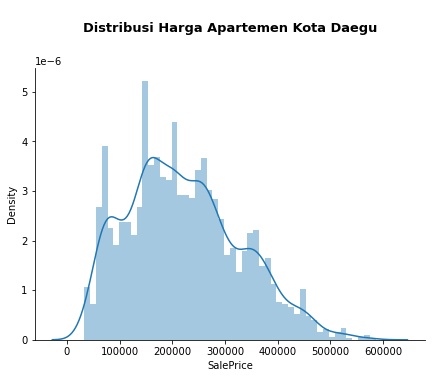

In [201]:
plt.figure(figsize=(7, 5))
sns.distplot(df['SalePrice'], bins=50)
plt.title('\nDistribusi Harga Apartemen Kota Daegu\n\n', size=13, weight='bold')
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Berdasarkan grafik di atas dengan bentuk kurva yang miring ke kanan, dapat diambil kesimpulan bahwa sebagian besar apartemen memiliki harga yang relatif rendah yaitu di angka 200.000 KRW, dan sebagian kecil apartemen memiliki harga sangat tinggi di angka 500.000 - 600.000 KRW. Meskipun tidak terlihat jelas, kemungkinan ada beberapa outliers yang terletak di ujung kanan kurva.

**Size of property related to price**

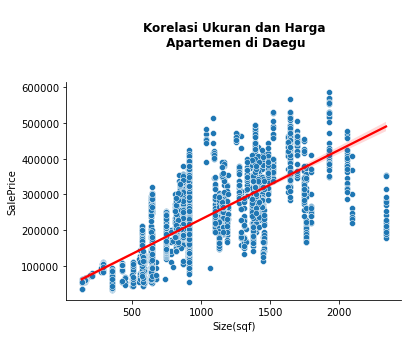

In [202]:
# Scatterplot dengan garis tren
sns.scatterplot(x='Size(sqf)', y='SalePrice', data=df)
sns.regplot(x='Size(sqf)', y='SalePrice', data=df, scatter=False, color='red')  # Tambahkan garis tren merah

plt.title('\nKorelasi Ukuran dan Harga\n Apartemen di Daegu\n\n', size=12, weight='bold')
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Tampilkan plot
plt.show()

Berdasarkan grafik di atas bisa dilihat adanya tren positif antara harga apartemen dengan ukurannya, yang artinya semakin besar ukuran apartemen maka akan semakin tinggi juga harga jualnya. Meskipun begitu, dari grafik di atas bisa dilihat **cukup banyak titik data yang tersebar jauh di luar garis tren**. Hal ini menunjukkan bahwa ukuran apartemen bukan satu-satunya faktor yang menentukan harga apartemen. Faktor lain seperti lokasi, fasilitas serta tipe hallway apartemen juga dapat memengaruhi harga.

**Types of property related to price**

In [203]:
print(f"Jumlah properti berdasarkan tipe kamar:\n{df['HallwayType'].value_counts()}")

Jumlah properti berdasarkan tipe kamar:
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64


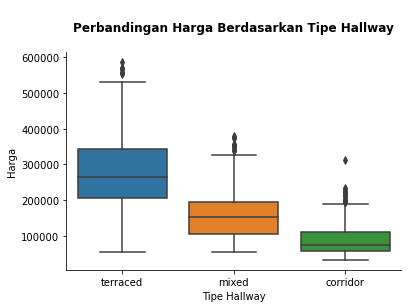

In [204]:
sns.boxplot(x='HallwayType', y='SalePrice', data=df)
plt.title('\nPerbandingan Harga Berdasarkan Tipe Hallway\n', weight='bold')
plt.xlabel('Tipe Hallway')
plt.ylabel('Harga')
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Berdasarkan grafik di atas bisa dilihat apartemen tipe hallway terraced disewakan dengan harga yang sangat bervariasi dan cenderung disewakan dengan harga yang lebih mahal. Sedangkan, apartemen tipe hallway corridor cenderung disewakan dengan harga yang lebih murah.

HallwayType,corridor,mixed,terraced
YearBuilt,,,
1978,163716.000000,nan,nan
1980,nan,nan,69468.500000
1985,70796.000000,nan,nan
1986,87610.000000,nan,184955.000000
1992,65486.000000,130973.000000,nan
1993,nan,155752.000000,nan
1997,nan,85398.000000,nan
2003,nan,123893.000000,nan
2005,nan,167035.000000,nan


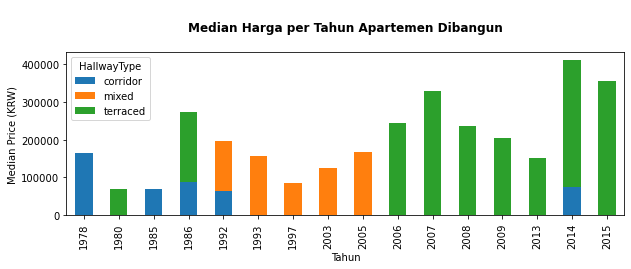

In [205]:
from IPython.display import display

apart_type = df.pivot_table(index='YearBuilt', columns='HallwayType', values='SalePrice', aggfunc='median')
display(apart_type)

pivot_plot = apart_type.plot.bar(stacked=True, figsize=(10, 3))
pivot_plot.set_xlabel('Tahun')
pivot_plot.set_ylabel('Median Price (KRW)')
pivot_plot.set_title('\nMedian Harga per Tahun Apartemen Dibangun\n', weight='bold');

Tipe apartemen terraced pertama kali dibangun di tahun 1980 dan mulai populer di tahun 2006 sampai tahun 2015 adalah tipe apartemen dengan jumlah paling banyak di kota Daegu. Dan dari grafik di atas bisa disimpulkan bahwa Tipe hallway memiliki pengaruh yang cukup signifikan terhadap harga apartemen. Secara umum, harga apartemen cenderung meningkat dari tahun ke tahun, terutama setelah tahun 2000. Namun harga juga mengalami fluktuasi yang mungkin dipengaruhi oleh faktor lain seperti kondisi ekonomi, kebijakan pemerintah, dan perubahan preferensi pasar. 

**Types of property related to facilities**

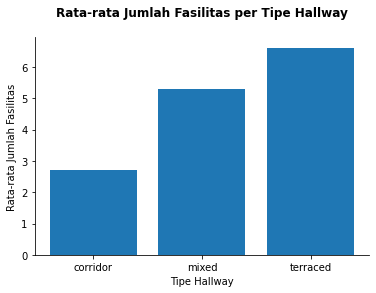

In [206]:
facilities_per_hallway = df.groupby('HallwayType')['N_FacilitiesInApt'].mean()

# Membuat bar chart
plt.bar(facilities_per_hallway.index, facilities_per_hallway.values)
plt.xlabel('Tipe Hallway')
plt.ylabel('Rata-rata Jumlah Fasilitas')
plt.title('Rata-rata Jumlah Fasilitas per Tipe Hallway\n', weight='bold')
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

Apartemen tipe hallway terraced cenderung memiliki fasilitas yang lebih lengkap dibandingkan tipe hallway lainnya.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan data cleaning yang hasilnya akan dipakai pada proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap tujuan penelitian.
- Melakukan treatment terhadap outliers pada fitur yang akan digunakan.

**Drop Columns**

Setelah ditinjau berdasarkan domain knowledge, ada fitur yang dirasa kurang jelas dan tidak relevan dengan analisis yang akan dilakukan. 
- Kolom **SubwayStation** akan dihapus karena kurang relevan untuk kepentingan analisis prediktif.
- Kolom **N_FacilitiesNearBy(ETC)** akan dihapus karena fasilitas lain yang ada di kolom ini tidak jelas dan bukan termasuk fasilitas yang penting untuk menjadi alasan pemilihan lokasi apartemen.

In [207]:
df = df.drop(columns=['SubwayStation','N_FacilitiesNearBy(ETC)'])

In [208]:
df.head()

,HallwayType,TimeToSubway,N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,5,1,0,1986,4,914,150442
2,mixed,15min~20min,7,3,56,1997,5,558,61946
3,mixed,5min~10min,5,4,798,2005,7,914,165486
4,terraced,0-5min,1,2,536,2006,5,1743,311504


**Data Correlation**

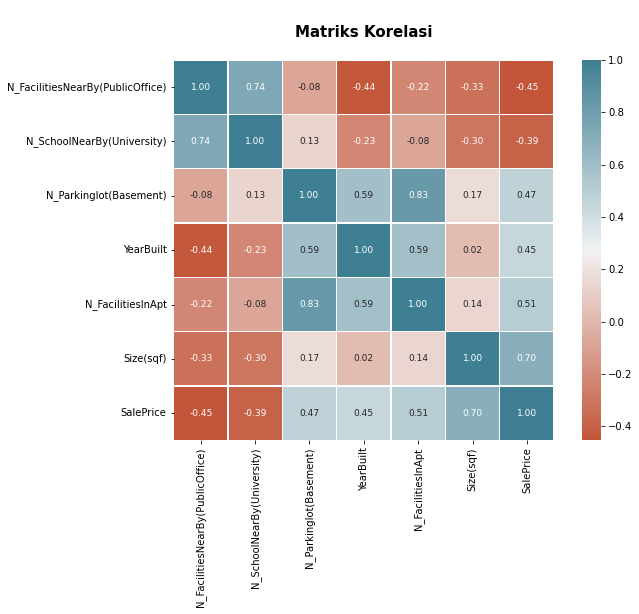

In [209]:
# Filter kolom numerik saja dari df
corr = df.select_dtypes(include='number').corr(method='pearson')

# Membuat heatmap
plt.figure(figsize=(10, 7))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5, annot_kws={'fontsize': 9})
plt.title('\nMatriks Korelasi\n', size=15, weight='bold')
plt.show()

Berdasarkan hasil matriks korelasi bisa disimpulkan bahwa:
- Adanya korelasi positif (0.74) antara **N_FacilitiesNearBy(PublicOffice)** dan **N_SchoolNearBy(University)** menunjukkan bahwa daerah yang memiliki banyak kantor publik cenderung juga memiliki banyak universitas.
- Adanya korelasi negatif (-0.44) dan (-0.45) antara **YearBuilt** dan **SalePrice** dengan **N_FacilitiesNearBy(PublicOffice)** menunjukkan bahwa apartemen yang lebih baru dibangun dan lebih mahal, kecil kemungkinannya untuk memiliki kantor publik di sekitarnya.


**Outliers Detection**

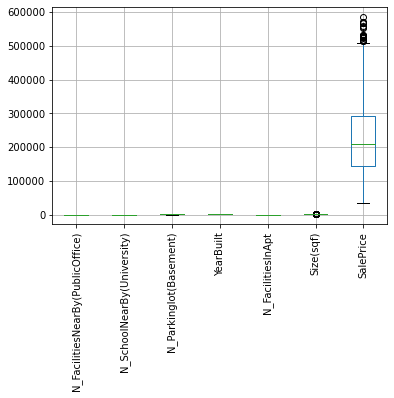

In [210]:
df.boxplot(rot=90);

Terdapat outliers di kolom **Size(sqf)** dan **SalePrice** . Kita akan cek dan tangani outliers tersebut

In [211]:
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_bound = q1 - limit
    upper_bound = q3 + limit
    print(f'limit_bawah: {lower_bound}')
    print(f'limit_atas: {upper_bound}')  

In [212]:
find_outliers(df['Size(sqf)'])

IQR: 505.0
limit_bawah: -113.5
limit_atas: 1906.5


In [213]:
find_outliers(df['SalePrice'])

IQR: 146398.0
limit_bawah: -74845.0
limit_atas: 510747.0


In [214]:
df = df[(df['Size(sqf)'] >= -113.5) & (df['Size(sqf)'] <= 1906.5)]

In [215]:
df = df[(df['SalePrice'] >= -74845.0) & (df['SalePrice'] <= 510747.0)]

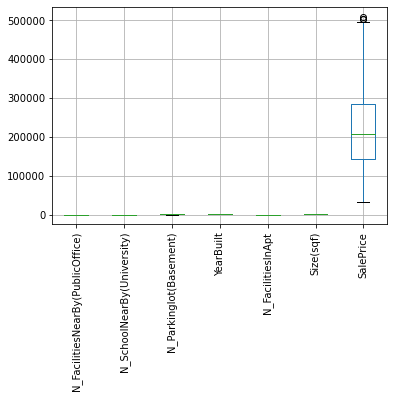

In [216]:
df.boxplot(rot=90)
plt.show()

In [217]:
df['Size(sqf)'].describe()

count   4015.000000
mean     925.216936
std      341.828592
min      135.000000
25%      644.000000
50%      910.000000
75%     1131.000000
max     1796.000000
Name: Size(sqf), dtype: float64

In [218]:
df['SalePrice'].describe()

count     4015.000000
mean    217551.669988
std     103126.367493
min      32743.000000
25%     143362.000000
50%     207079.000000
75%     285840.000000
max     508849.000000
Name: SalePrice, dtype: float64

**Clean Dataset**

In [219]:
df.head()

,HallwayType,TimeToSubway,N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,5,1,0,1986,4,914,150442
2,mixed,15min~20min,7,3,56,1997,5,558,61946
3,mixed,5min~10min,5,4,798,2005,7,914,165486
4,terraced,0-5min,1,2,536,2006,5,1743,311504


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 0 to 4122
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4015 non-null   object
 1   TimeToSubway                      4015 non-null   object
 2   N_FacilitiesNearBy(PublicOffice)  4015 non-null   int64 
 3   N_SchoolNearBy(University)        4015 non-null   int64 
 4   N_Parkinglot(Basement)            4015 non-null   int64 
 5   YearBuilt                         4015 non-null   int64 
 6   N_FacilitiesInApt                 4015 non-null   int64 
 7   Size(sqf)                         4015 non-null   int64 
 8   SalePrice                         4015 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 313.7+ KB


**Modeling**

Agar dapat menggunakan semua fitur, data kategorikal harus diubah menjadi data numerik. Pada analisis ini kita menggunakan One Hot Encoding untuk mengubah kolom HallwayType dan TimeToSubway.

In [221]:
df['HallwayType'].unique()

array(['terraced', 'mixed', 'corridor'], dtype=object)

In [222]:
df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [223]:
df = pd.get_dummies(df, columns=['HallwayType'], dtype='int32')

In [224]:
df = pd.get_dummies(df, columns=['TimeToSubway'], dtype='int32')

**Data Splitting**

In [225]:
# Memisahkan data independen variabel dengan target
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

**Train and Test Splitting**

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 999)

**Choose a Benchmark Model**

Pada analisis ini kita akan membandingkan 3 model yaitu :
- Linear regression
- Decision Tree
- Random Forest

#### Linear Regression

In [227]:
lr_model = linear_model.LinearRegression() 

In [228]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [229]:
# Prediksi dengan data train
y_pred_train_lr = lr_model.predict(X_train)

# Prediksi dengan data test
y_pred_test_lr = lr_model.predict(X_test)

In [ ]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [230]:
# Evaluasi prediksi dengan data train
r2_train_lr = r2_score(y_train, y_pred_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mape_train_lr = mean_absolute_percentage_error(y_train, y_pred_train_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

# Evaluasi prediksi dengan data test
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mape_test_lr = mean_absolute_percentage_error(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

In [231]:
# Membuat DataFrame untuk menampung hasil evaluasi
data_lr = { 
    'Train': [r2_train_lr, mae_train_lr, mse_train_lr, rmse_train_lr, mape_train_lr],
    'Test': [r2_test_lr, mae_test_lr, mse_test_lr, rmse_test_lr, mape_test_lr]
}

eval_metrics_lr = pd.DataFrame(data_lr, index=['R squared', 'MAE', 'MSE', 'RMSE', 'MAPE'])
pd.set_option('display.float_format', '{:.6f}'.format)
eval_metrics_lr

,Train,Test
R squared,0.759249,0.762222
MAE,41674.783279,41721.779546
MSE,2534490860.363183,2620915339.773013
RMSE,50343.727120,51194.876109
MAPE,22.946146,22.561185


- R-squared, MAE, MSE, RMSE, dan MAPE menunjukkan bahwa model memiliki performa yang cukup konsisten antara data train dan data test.
- Tidak ada perbedaan signifikan antara performa model pada data train dan data test, yang mengindikasikan bahwa model tidak mengalami overfitting.
- Berdasarkan nilai R-square, model Linear Regression mampu menjelaskan sekitar 75-76% variabilitas dari target (cukup baik).
- Namun, nilai kesalahan absolut dan kuadrat (MAE, MSE, RMSE) masih cukup tinggi, mengindikasikan bahwa meskipun model mampu menangkap pola secara umum, ada beberapa prediksi yang meleset cukup jauh.
- MAPE sebesar 22% menunjukkan bahwa prediksi model meleset sekitar 22% dari nilai sebenarnya, yang bisa dianggap besar untuk konteks prediksi harga sewa apartemen

#### Decision Tree

In [232]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [233]:
# Prediksi dengan data train
y_pred_train_dt = dt_model.predict(X_train)

# Prediksi dengan data test
y_pred_test_dt = dt_model.predict(X_test)

In [234]:
# Evaluasi prediksi dengan data train
r2_train_dt = r2_score(y_train, y_pred_train_dt)
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
mape_train_dt = mean_absolute_percentage_error(y_train, y_pred_train_dt)
rmse_train_dt = np.sqrt(mse_train_dt)

# Evaluasi prediksi dengan data test
r2_test_dt = r2_score(y_test, y_pred_test_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
mape_test_dt = mean_absolute_percentage_error(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mse_test_dt)

In [235]:
data_dt = { 
    'Train': [r2_train_dt, mae_train_dt, mse_train_dt, rmse_train_dt, mape_train_dt],
    'Test': [r2_test_dt, mae_test_dt, mse_test_dt, rmse_test_dt, mape_test_dt]
}

eval_metrics_dt = pd.DataFrame(data_dt, index=['R squared', 'MAE', 'MSE', 'RMSE', 'MAPE'])
eval_metrics_dt

,Train,Test
R squared,0.842536,0.838199
MAE,32054.993923,33609.741722
MSE,1657685575.873061,1783460066.655952
RMSE,40714.685015,42231.032034
MAPE,17.638446,18.253315


- Dengan R-squared sebesar 84.25% pada data train dan 83.82% pada data test, model ini dapat menjelaskan sekitar 84% dari variasi dalam harga apartemen untuk data train dan 83.82% untuk data test. Ini menunjukkan bahwa model Decision Tree ini cukup baik dalam menangkap pola dalam data dibandingkan model Linear Regression sebelumnya.
- Nilai MAE, RMSE, dan MAPE yang relatif kecil menunjukkan bahwa model dapat memberikan prediksi yang akurat dibandingkan model Linear Regression sebelumnya.
- Tidak ada indikasi overfitting

#### Random Forest

In [236]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [237]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [238]:
# Prediksi dengan data train
y_pred_train_rf = dt_model.predict(X_train)

# Prediksi dengan data test
y_pred_test_rf = dt_model.predict(X_test)

In [239]:
# Evaluasi prediksi dengan data train
r2_train_rf = r2_score(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mape_train_rf = mean_absolute_percentage_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)

# Evaluasi prediksi dengan data test
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)


In [240]:
# Membuat DataFrame untuk menampung hasil evaluasi
data_rf = { 
    'Train': [r2_train_rf, mae_train_rf, mse_train_rf, rmse_train_rf, mape_train_rf],
    'Test': [r2_test_rf, mae_test_rf, mse_test_rf, rmse_test_rf, mape_test_rf]
}

eval_metrics_rf = pd.DataFrame(data_rf, index=['R squared', 'MAE', 'MSE', 'RMSE', 'MAPE'])
eval_metrics_rf

,Train,Test
R squared,0.842536,0.838199
MAE,32054.993923,33609.741722
MSE,1657685575.873061,1783460066.655952
RMSE,40714.685015,42231.032034
MAPE,17.638446,18.253315


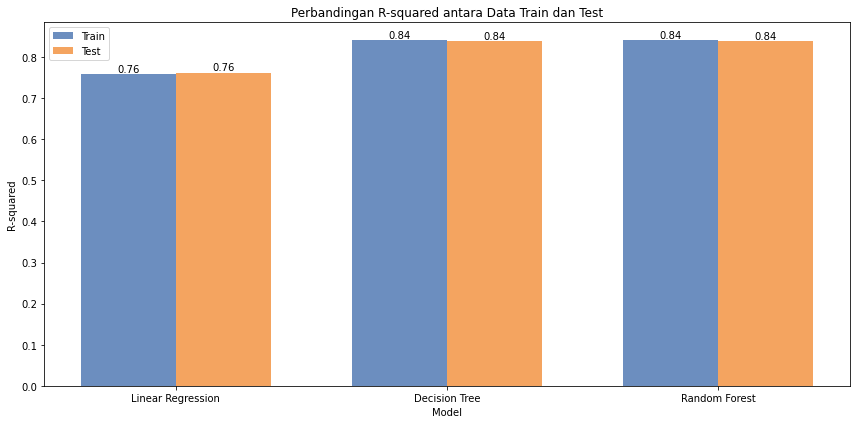

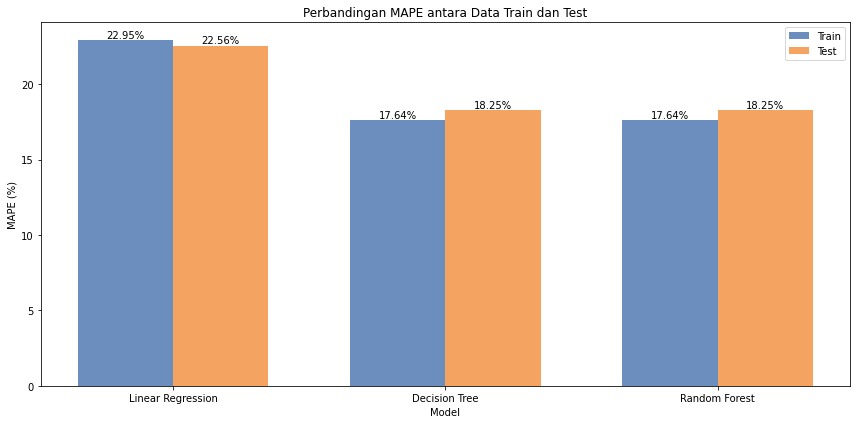

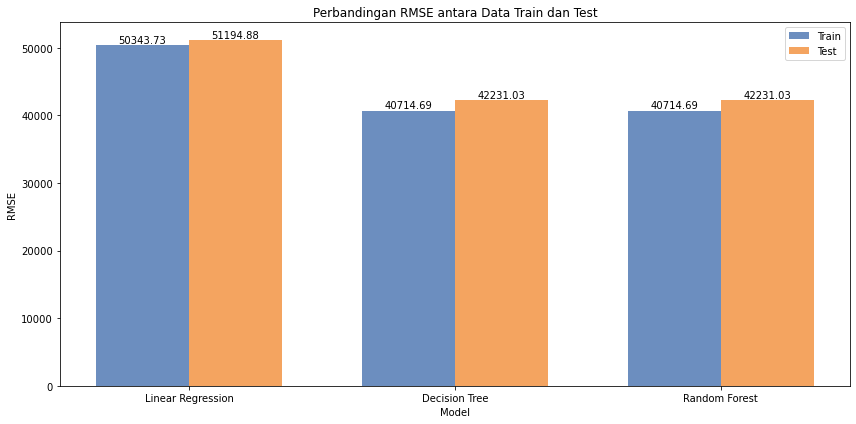

In [257]:
# Hasil evaluasi model
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_train = [r2_train_lr, r2_train_dt, r2_train_rf]  # R-squared train
r2_test = [r2_test_lr, r2_test_dt, r2_test_rf]      # R-squared test
mape_train = [mape_train_lr, mape_train_dt, mape_train_rf]  # MAPE train
mape_test = [mape_test_lr, mape_test_dt, mape_test_rf]      # MAPE test
rmse_train = [rmse_train_lr, rmse_train_dt, rmse_train_rf]  # RMSE train
rmse_test = [rmse_test_lr, rmse_test_dt, rmse_test_rf]      # RMSE test

train_colors = ['#6c8ebf'] * len(models)  # Warna untuk train
test_colors = ['#f4a460'] * len(models)    # Warna untuk test

# Plot R-squared
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(models))

bars_train = plt.bar(index, r2_train, bar_width, color=train_colors, label='Train')
bars_test = plt.bar(index + bar_width, r2_test, bar_width, color=test_colors, label='Test')

plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Perbandingan R-squared antara Data Train dan Test')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Tambahkan nilai di atas batang R-squared
for bars in [bars_train, bars_test]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot MAPE
plt.figure(figsize=(12, 6))

bars_train = plt.bar(index, mape_train, bar_width, color=train_colors, label='Train')
bars_test = plt.bar(index + bar_width, mape_test, bar_width, color=test_colors, label='Test')

plt.xlabel('Model')
plt.ylabel('MAPE (%)')
plt.title('Perbandingan MAPE antara Data Train dan Test')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Tambahkan nilai di atas batang MAPE
for bars in [bars_train, bars_test]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))

bars_train = plt.bar(index, rmse_train, bar_width, color=train_colors, label='Train')
bars_test = plt.bar(index + bar_width, rmse_test, bar_width, color=test_colors, label='Test')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE antara Data Train dan Test')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Tambahkan nilai di atas batang RMSE
for bars in [bars_train, bars_test]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Performa model Decision Tree dan Random Forest yang terlihat serupa dalam hal Evaluation Metrics R-squared, MAE, MSE, RMSE, dan MAPE. Meskipun Random Forest biasanya diharapkan memberikan performa yang lebih baik daripada Decision Tree karena karakteristik ensemble-nya, dalam situasi tertentu, seperti ketika data cukup sederhana atau tidak kompleks dalam case ini, kedua model bisa menunjukkan hasil yang serupa. Selanjutnya akan dilakukan hyperparameter tuning pada model Random Forest untuk meningkatkan performa model. Hyperparameter tuning akan dilakukan untuk mencari konfigurasi terbaik yang dapat meningkatkan akurasi dan stabilitas model. Proses ini melibatkan penyesuaian berbagai parameter kunci, seperti jumlah pohon, kedalaman, jumlah fitur yang akan digunakan, dll. Dengan langkah-langkah ini, diharapkan model Random Forest dapat memberikan hasil prediksi yang lebih akurat dan lebih robust, serta dapat menangkap pola yang lebih kompleks dalam data, sehingga lebih baik dalam generalisasi pada data baru.

##### Random Forest Tuning

In [241]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],      
    'bootstrap': [True, False]         
}

In [242]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

In [243]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.3min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [245]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


Hasil best parameters dari proses tuning untuk model Random Forest menunjukkan konfigurasi optimal yang dapat meningkatkan performa model.
- bootstrap: True berarti model akan menggunakan sampling dengan pengembalian untuk membangun setiap pohon, yang membantu meningkatkan keberagaman antar pohon dan mengurangi overfitting. 
- max_depth: 10 membatasi kedalaman maksimum setiap pohon, menjaga agar model tetap sederhana dan mencegah pembelajaran dari noise dalam data.
- min_samples_leaf: 1 mengizinkan setiap daun memiliki setidaknya satu sampel, yang memastikan pohon dapat membelah hingga detail terkecil.
- min_samples_split: 5 mensyaratkan bahwa setidaknya lima sampel diperlukan untuk membagi simpul, yang membantu menjaga struktur pohon agar tidak terlalu kompleks.
- n_estimators: 200 menunjukkan bahwa model akan membangun 200 pohon dalam forest, yang meningkatkan akurasi dengan mengurangi varians model. Kombinasi parameter ini dirancang untuk memaksimalkan akurasi prediksi dan meningkatkan generalisasi model pada data baru.


In [246]:
model_rf_tuning = grid_search.best_estimator_

In [247]:
# Prediksi dengan data train
y_pred_train_rf_tuning = model_rf_tuning.predict(X_train)

# Prediksi dengan data test
y_pred_test_rf_tuning = model_rf_tuning.predict(X_test)

In [248]:
# Evaluasi prediksi dengan data train
r2_train_rf_tuning = r2_score(y_train, y_pred_train_rf_tuning)
mae_train_rf_tuning = mean_absolute_error(y_train, y_pred_train_rf_tuning)
mse_train_rf_tuning = mean_squared_error(y_train, y_pred_train_rf_tuning)
mape_train_rf_tuning = mean_absolute_percentage_error(y_train, y_pred_train_rf_tuning)
rmse_train_rf_tuning = np.sqrt(mse_train_rf_tuning)

# Evaluasi prediksi dengan data test
r2_test_rf_tuning = r2_score(y_test, y_pred_test_rf_tuning)
mae_test_rf_tuning = mean_absolute_error(y_test, y_pred_test_rf_tuning)
mse_test_rf_tuning = mean_squared_error(y_test, y_pred_test_rf_tuning)
mape_test_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_test_rf_tuning)
rmse_test_rf_tuning = np.sqrt(mse_test_rf_tuning)

In [249]:
# Membuat DataFrame untuk menampung hasil evaluasi
data_rf_tuning = { 
    'Train': [r2_train_rf_tuning, mae_train_rf_tuning, mse_train_rf_tuning, rmse_train_rf_tuning, mape_train_rf_tuning],
    'Test': [r2_test_rf_tuning, mae_test_rf_tuning, mse_test_rf_tuning, rmse_test_rf_tuning, mape_test_rf_tuning]
}

eval_metrics_rf_tuning = pd.DataFrame(data_rf_tuning, index=['R squared', 'MAE', 'MSE', 'RMSE', 'MAPE'])
eval_metrics_rf_tuning


,Train,Test
R squared,0.842356,0.838234
MAE,32114.886244,33613.219203
MSE,1659583089.709209,1783079223.905406
RMSE,40737.980923,42226.522754
MAPE,17.702764,18.299884


***Analisis Perbandingan Random Forest sebelum & setelah Tuning***

- R-squared: Setelah tuning, nilai R-squared sedikit menurun untuk kedua dataset (train dan test). Hal ini menunjukkan bahwa meskipun model sebelumnya mampu menjelaskan variasi yang sedikit lebih besar, penurunan ini tidak signifikan.
- MAE: Terdapat sedikit peningkatan pada nilai MAE setelah tuning, yang menunjukkan bahwa prediksi harga rata-rata sedikit lebih buruk dibandingkan sebelumnya. Ini menandakan bahwa tuning mungkin belum memberikan hasil yang diharapkan dalam hal akurasi.
- MSE dan RMSE: Metrik ini menunjukkan peningkatan pada nilai kesalahan setelah tuning. MSE dan RMSE pada data pelatihan dan pengujian mengalami sedikit kenaikan, yang juga menunjukkan bahwa performa model menurun sedikit setelah tuning.
- MAPE: MAPE juga menunjukkan peningkatan yang kecil setelah tuning, menunjukkan bahwa kesalahan relatif rata-rata dalam prediksi harga sedikit lebih tinggi dibandingkan sebelumnya.

Meskipun biasanya tuning diharapkan dapat meningkatkan performa model, dalam kasus ini hasil evaluasi menunjukkan bahwa model Random Forest yang tidak dituning sedikit lebih baik dalam hal akurasi prediksi. 

**Feature Importances**


Untuk dapat mengetahui fitur apa saja yang sangat mempengaruhi target atau SalePrice, kita akan melakukan pengecekan melalui function feature_importances

In [250]:
feature_importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


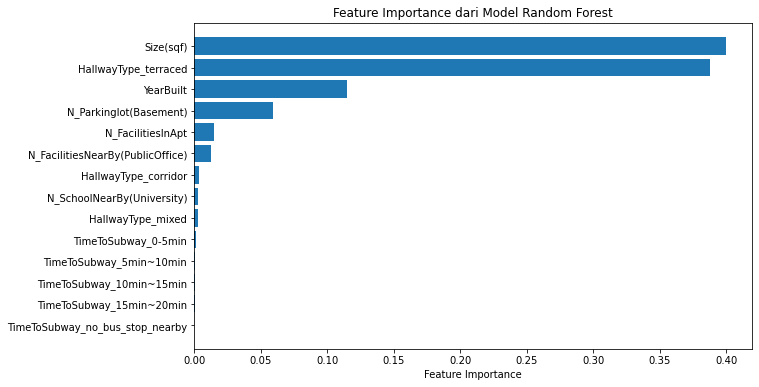

In [251]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance dari Model Random Forest')
plt.gca().invert_yaxis()
plt.show()

### **Conclusion**

Berdasarkan model dengan error terkecil yaitu model Random Forest, kolom fitur yang paling berpengaruh adalah kolom Size(sqf), HallwayType dengan tipe terraced, dan YearBuilt. Fitur-fitur ini memegang peranan penting dalam menentukan harga apartemen. Mengetahui kolom fitur yang paling berpengaruh dapat menjadi acuan dalam menentukan harga yang lebih kompetitif dari unit apartemen tersebut. Fitur tersebut juga dapat membantu pembeli/investor untuk memahami faktor-faktor utama yang mempengaruhi harga apartemen.

Setelah melakukan evaluation matrics, kita sudah mengetahui nilai R-squared, MAE, MAPE, MSE, dan RMSE berdasarkan beberapa model dan melewati hyperparameter tuning.  Model ini memiliki akurasi yang cukup baik dengan nilai R-squared sekitar 0,848. Artinya model mampu menjelaskan sekitar 84,8% variabilitas harga apartemen. Error terkecil didapatkan 15% kesalahan prediksi. Artinya jika kita menggunakan model ini untuk memperkirakan harga unit apartemen di Daegu, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 15% dari harga seharusnya, yang berarti masih ada ruang untuk perbaikan lebih lanjut. 


### **Recommendation**

Kami ingin memberikan saran apa saja hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi :

- Penambahan fitur yang lebih korelatif dengan target dapat ditambahkan untuk meningkatkan prediksi. 
- pengujian A/B Testing juga dapat dilakukan untuk menguji efektivitas model. 
- Model ini juga perlu untuk dimonitor secara berkala dengan melihat performa dari model ini agar tetap relevan dengan perubahan pasar seperti tren properti atau perubahan ekonomi yang mempengaruhi harga apartemen. 
- Berdasarkan analisis model, fitur yang paling berpengaruh seperti Luas apartemen **(Size(sqf))**, kamar tipe koridor **(HallwayType_terraced)**, dan tahun dibangun **(YearBuilt)** sangat mempengaruhi harga apartemen. Pemilik apartemen dapat menggunakan informasi ini untuk menetapkan harga yang lebih kompetitif sesuai dengan fitur ini. 
- Pemilik apartemen juga dapat mengetahui fasilitas dan tipe kamar yang paling berperan penting terhadap harga sehingga dapat ditingkatkan fasilitas tersebut untuk meningkatkan daya tarik dan nilai jual.
- Strategi pemasaran juga dapat difokuskan pada fitur fitur yang paling mempengaruhi harga jual. 



#### Save Model

In [88]:
#import pickle

In [86]:
# Menyimpan model
#with open('rf.pkl', 'wb') as file:
   # pickle.dump(rf, file)

In [87]:
# Load model
#with open('rf.pkl', 'rb') as file:
#    model_rf = pickle.load(file)